In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [78]:
data = pd.read_csv('/content/drive/MyDrive/heart_data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


About Dataset:

**age:** Age of the patient

**sex:** Gender of the patient (1=male, 0=female)

**chest pain type (cp):** Categorized into 4 values

**resting blood pressure (trestbps):** The patient's resting blood pressure

**serum cholesterol (chol):** The level of cholesterol in the blood, measured in milligrams per deciliter (mg/dl)

**fasting blood sugar (fbs):** Binary indicator (1 if fasting blood sugar > 120 mg/dl, 0 otherwise)

**resting electrocardiographic results (restecg):** Categorized into values 0, 1, 2 -- Values: [normal, stt abnormality, lv hypertrophy]

**maximum heart rate achieved (thalach):** The highest heart rate during exercise

**exercise-induced angina (exang):** Binary indicator for exercise-induced angina (True/ False) (1/0)

**oldpeak:** ST depression induced by exercise relative to rest.

**slope:** The slope of the peak exercise ST segment. (downsloping/flat/upsloping)

**number of major vessels colored by fluoroscopy (ca):** Ranges from 0 to 3.

**thal:** Categorized as 0 = normal, 1 = fixed defect, 2 = reversible defect.

The **target** indicates the presence of heart disease in the patient, with integer values: 0 = no disease, 1 = disease.

In [79]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It's good. There are no missing values.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [81]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Target Distribution | 0 = no disease, 1 = disease**

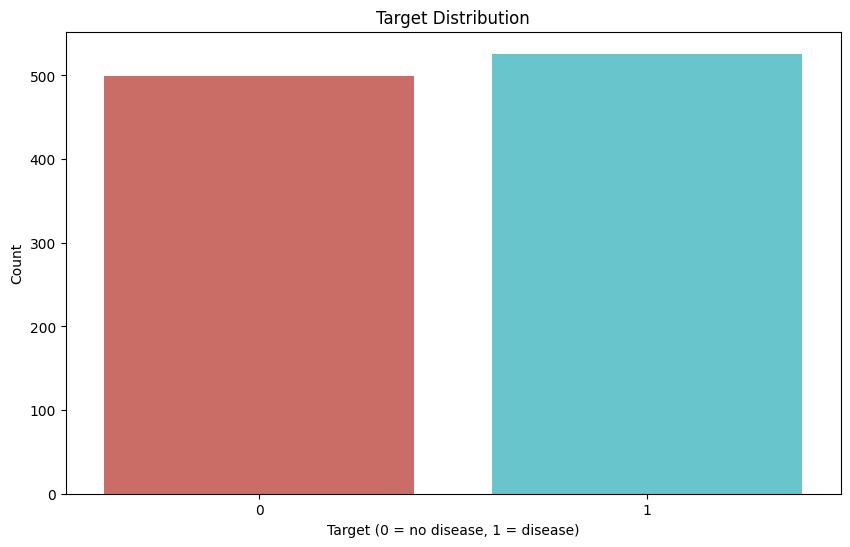

In [108]:
plt.figure(figsize=(10,6))
plt.title('Target Distribution')
ax = sns.countplot(x=data['target'], palette='hls')
plt.xlabel('Target (0 = no disease, 1 = disease)')
plt.ylabel('Count')
plt.show()

**Age Distribution**

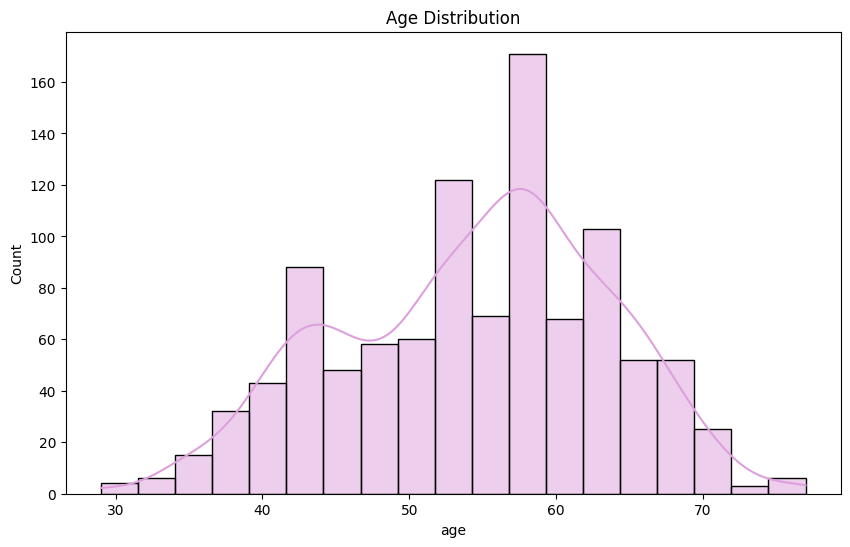

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color="plum")
plt.title('Age Distribution')
plt.show()

The age column distribution is normaly distributed because we can clearly see the bell curve.

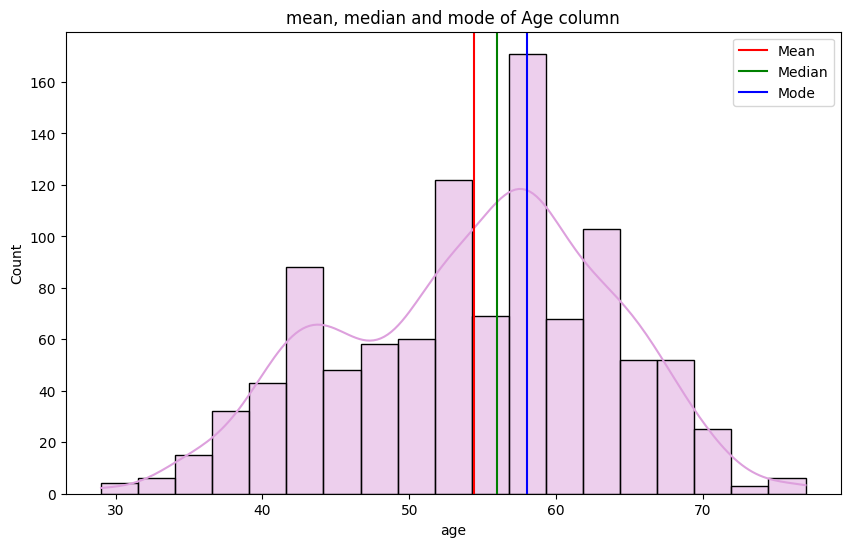

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color="plum")
plt.axvline(data['age'].mean(), color='red', label='Mean')
plt.axvline(data['age'].median(), color='green', label='Median')
plt.axvline(data['age'].mode()[0], color='blue', label='Mode')
plt.title('mean, median and mode of Age column')
plt.legend()
plt.show()

**Gender Distribution**

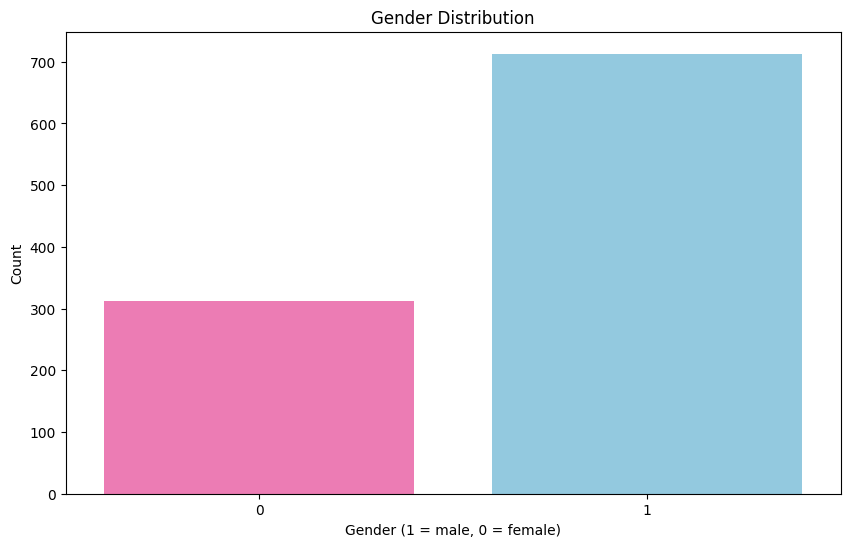

In [110]:
plt.figure(figsize=(10,6))
plt.title('Gender Distribution')
ax = sns.countplot(x=data['sex'], palette=['hotpink', 'skyblue'])
plt.xlabel('Gender (1 = male, 0 = female)')
plt.ylabel('Count')
plt.show()

In [86]:
male_count = 713
female_count = 312

total_count = male_count + female_count

male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

Male percentage in the data: 69.56%
Female percentage in the data : 30.44%


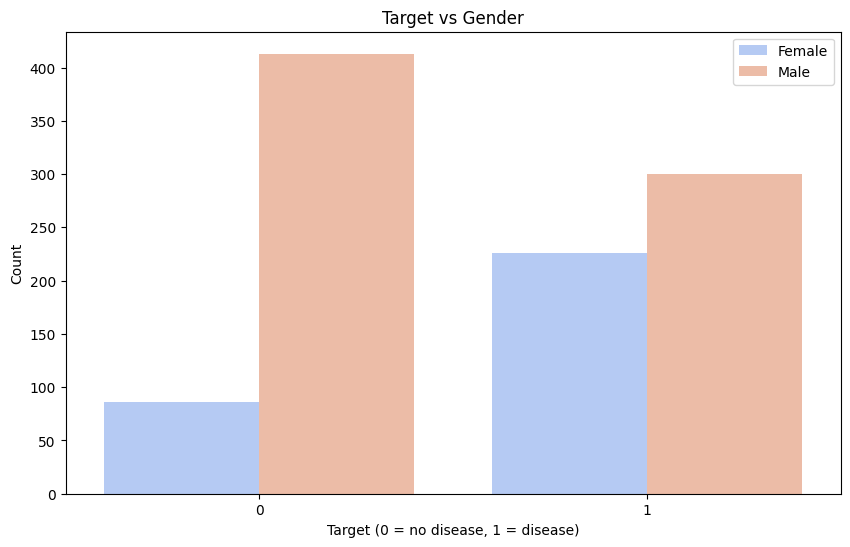

In [122]:
plt.figure(figsize=(10,6))
plt.title('Target vs Gender')
sns.countplot(x=data['target'], hue=data['sex'], palette='coolwarm')
plt.xlabel('Target (0 = no disease, 1 = disease)')
plt.ylabel('Count')
plt.legend(labels=['Female', 'Male'], loc='upper right')
plt.show()

**Chest Pain Distribution**

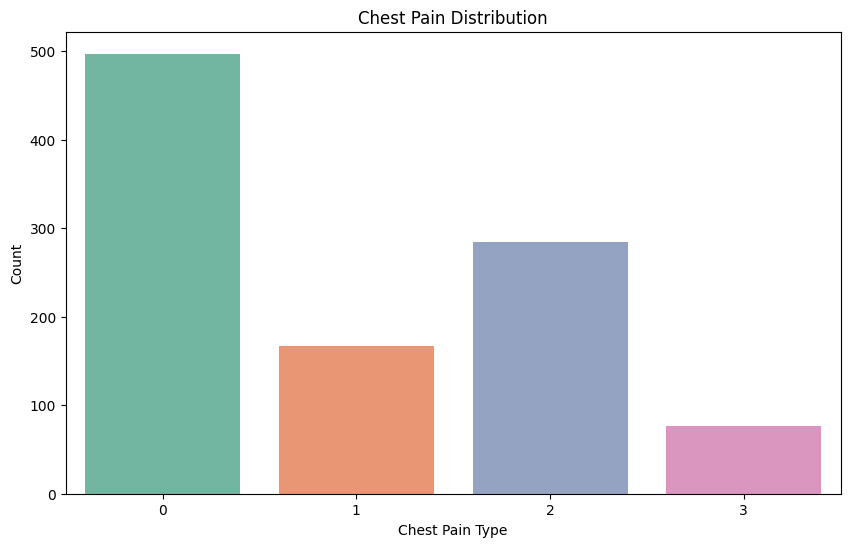

In [87]:
plt.figure(figsize=(10,6))
plt.title('Chest Pain Distribution')
ax = sns.barplot(x=data['cp'].value_counts().index, y=data['cp'].value_counts().values, palette='Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

plt.show()

Four types of chest pain as mentioned in the dataset description.

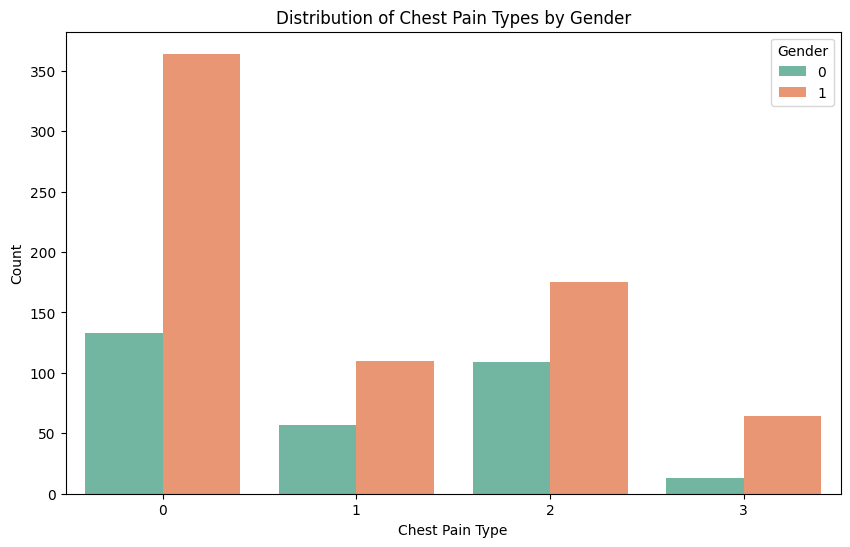

In [88]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Chest Pain Types by Gender')
sns.countplot(data=data, x='cp', hue='sex', palette='Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

We can see that these chain pain types occur in males more than females.

**Resting Blood Pressure**

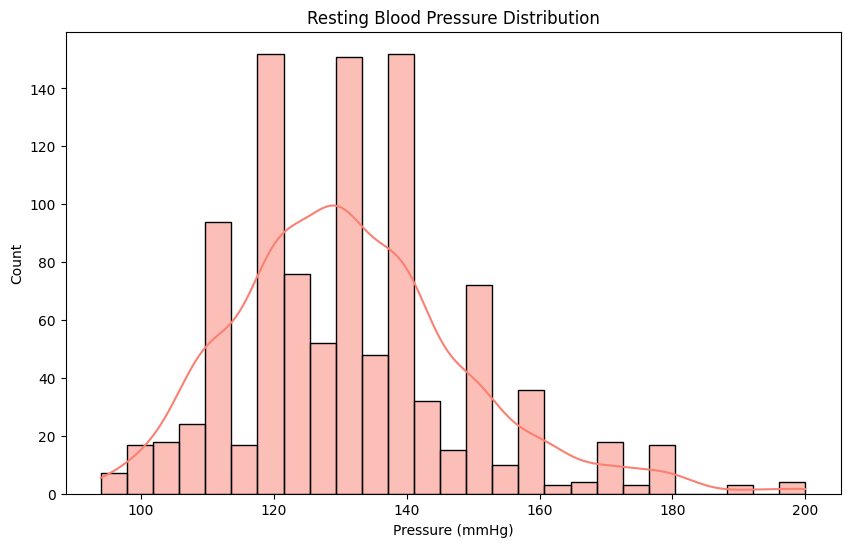

In [89]:
plt.figure(figsize=(10,6))
plt.title('Resting Blood Pressure Distribution')
sns.histplot(data['trestbps'], kde=True, color='salmon')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

**Histplot of trestbps column to analyse with gender**

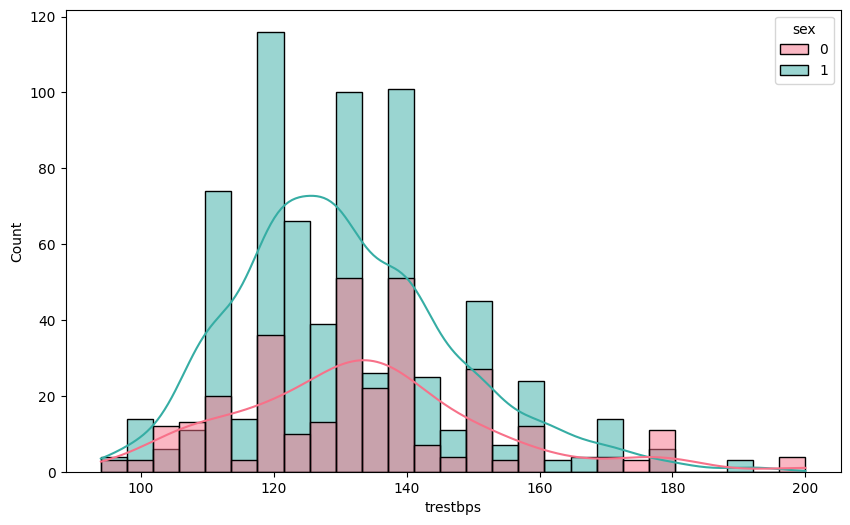

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(data, x='trestbps', kde=True, palette = "husl", hue ='sex')
plt.show()

**Serum cholesterol (Chol)**

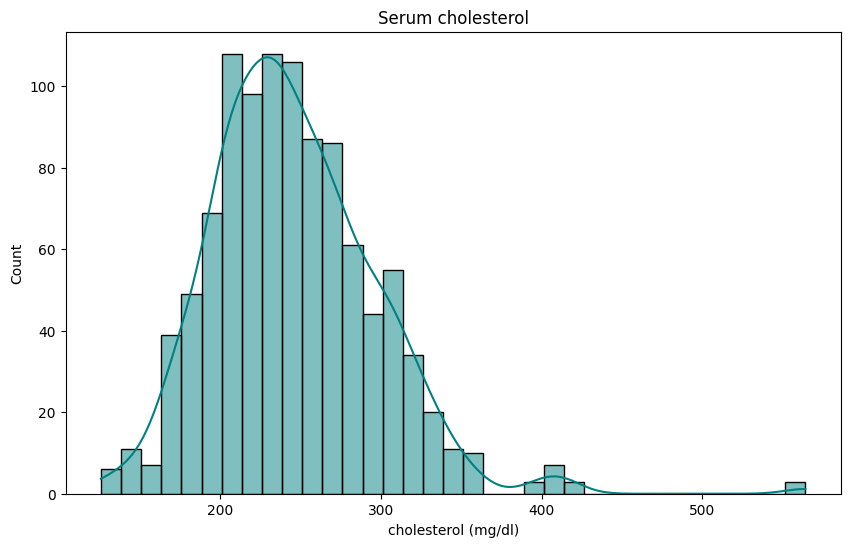

In [91]:
plt.figure(figsize=(10,6))
plt.title('Serum cholesterol')
sns.histplot(data['chol'], kde=True, color='teal')
plt.xlabel('cholesterol (mg/dl)')
plt.ylabel('Count')
plt.show()

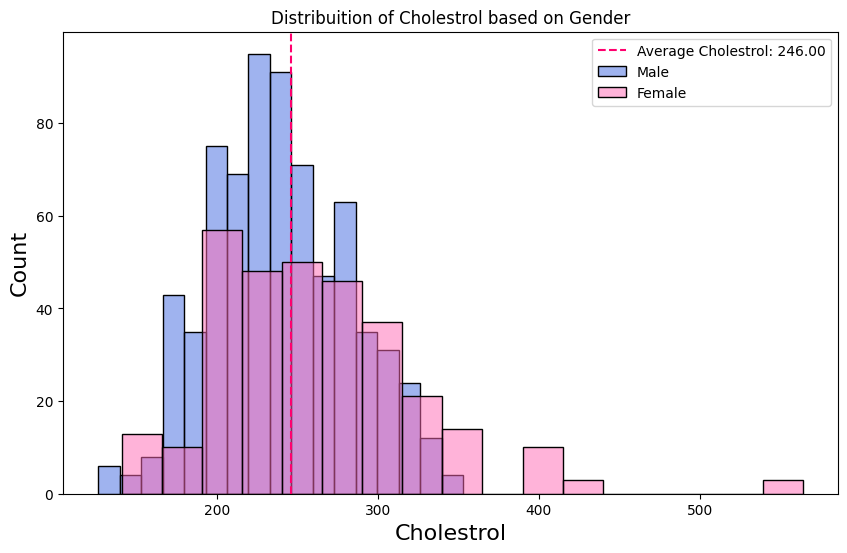

In [92]:
average_chol = np.mean(data['chol'])

plt.figure(figsize=(10,6))
plt.title('Distribuition of Cholestrol based on Gender')
sns.histplot(data[data['sex']==1]['chol'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(data[data['sex']==0]['chol'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_chol, color='#ff006e', linestyle='--', label=f'Average Cholestrol: {average_chol:.2f}')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

**fasting blood sugar Distribution**

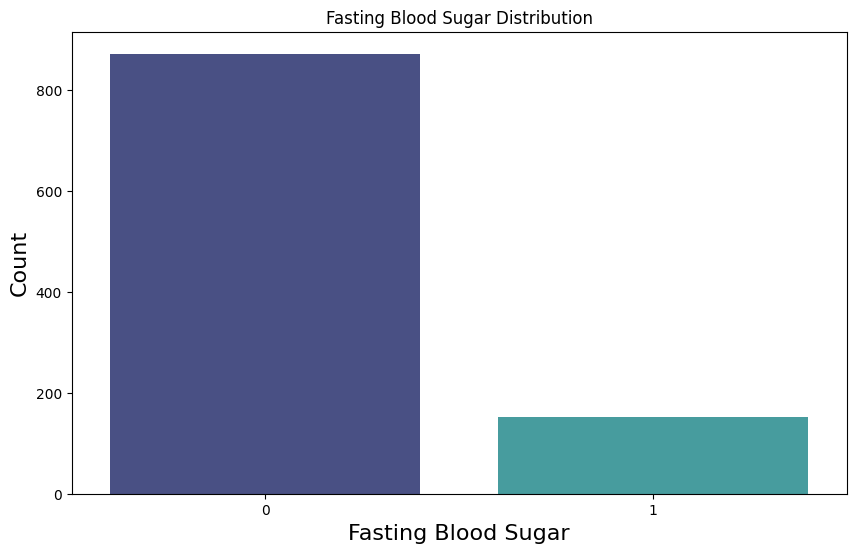

In [97]:
plt.figure(figsize=(10,6))
plt.title('Fasting Blood Sugar Distribution')
sns.barplot(x=data['fbs'].value_counts().index, y=data['fbs'].value_counts().values, palette='mako')
plt.xlabel('Fasting Blood Sugar', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

**Resting electrocardiographic results distribution**

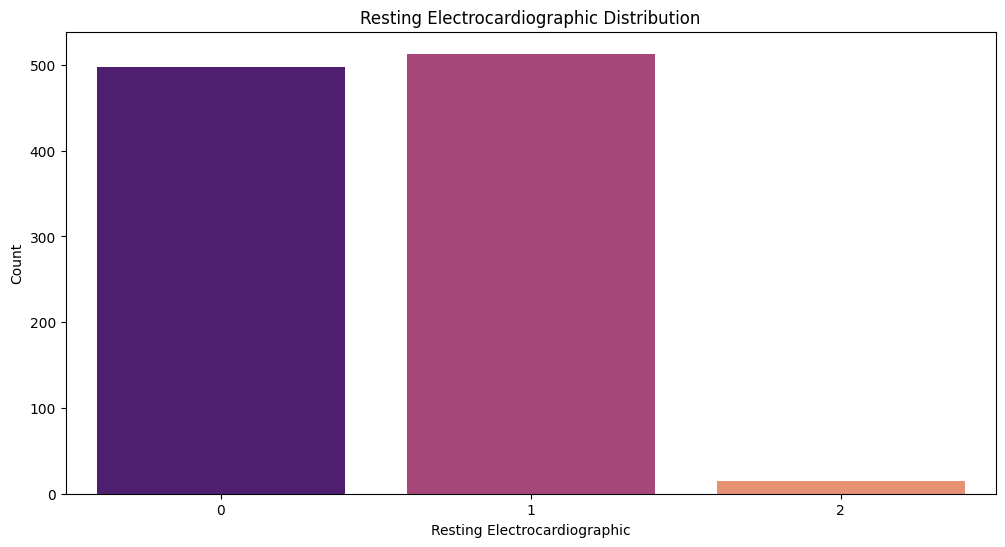

In [103]:
plt.figure(figsize=(12,6))
plt.title('Resting Electrocardiographic Distribution')
sns.barplot(x=data['restecg'].value_counts().index, y=data['restecg'].value_counts().values, palette='magma')
plt.xlabel('Resting Electrocardiographic')
plt.ylabel('Count')
plt.show()

**Maximum heart rate**

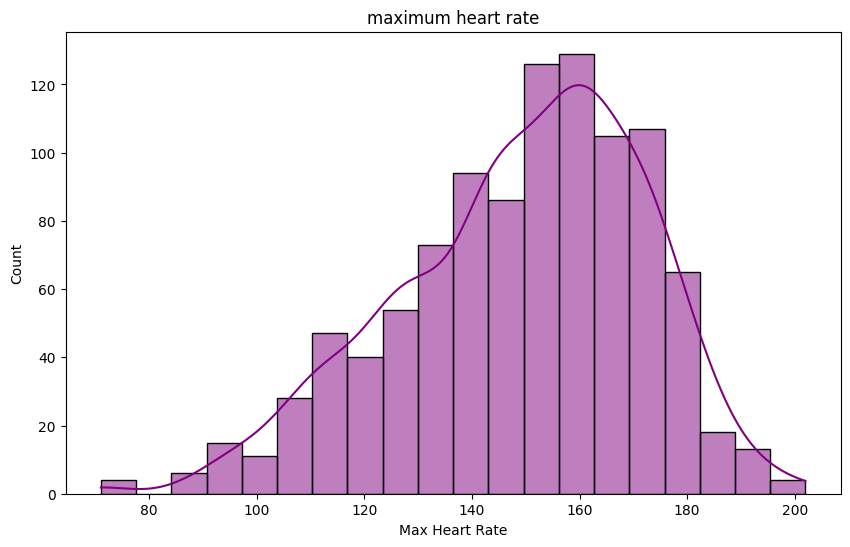

In [105]:
plt.figure(figsize=(10,6))
plt.title('maximum heart rate')
sns.histplot(data['thalach'], kde=True, color='purple')
plt.xlabel('Max Heart Rate')
plt.ylabel('Count')
plt.show()

**exercise-induced angina - (True/ False) (1/0)**

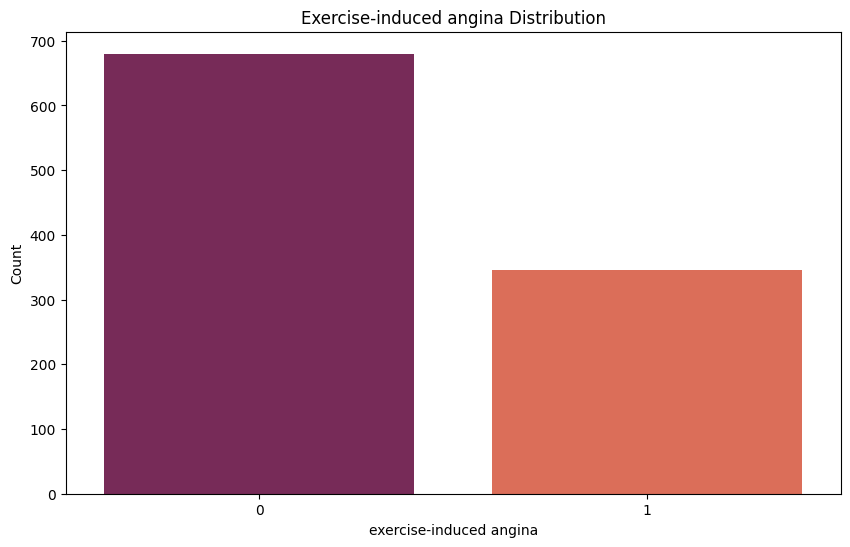

In [111]:
plt.figure(figsize=(10,6))
plt.title('Exercise-induced angina Distribution')
sns.barplot(x=data['exang'].value_counts().index, y=data['exang'].value_counts().values, palette='rocket')
plt.xlabel('exercise-induced angina')
plt.ylabel('Count')
plt.show()

**oldpeak (ST depression)**

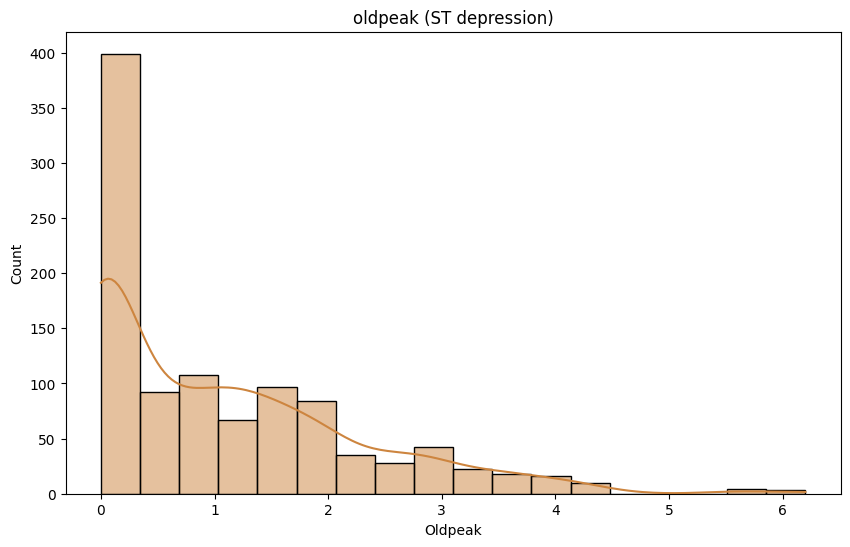

In [112]:
plt.figure(figsize=(10,6))
plt.title('oldpeak (ST depression)')
sns.histplot(data['oldpeak'], kde=True, color='peru')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

**Slope Distribution - Values: [normal, stt abnormality, lv hypertrophy]**

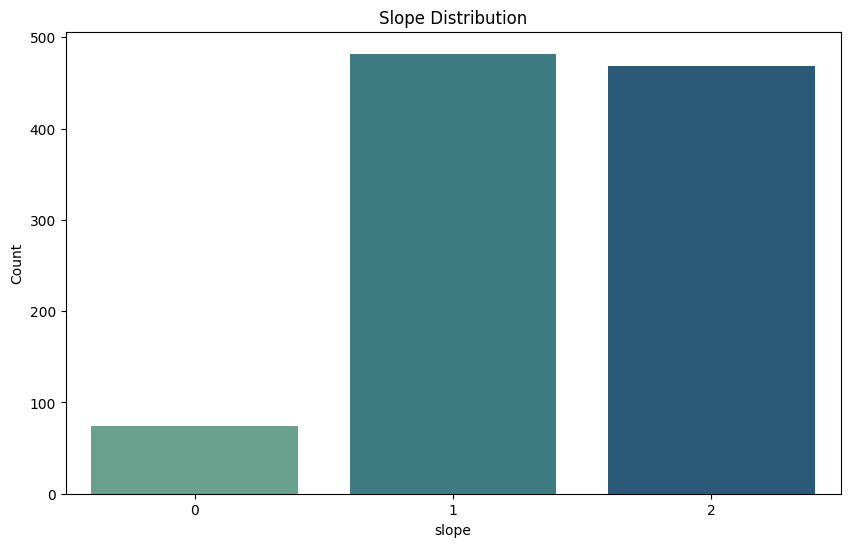

In [113]:
plt.figure(figsize=(10,6))
plt.title('Slope Distribution')
sns.barplot(x=data['slope'].value_counts().index, y=data['slope'].value_counts().values, palette='crest')
plt.xlabel('slope')
plt.ylabel('Count')
plt.show()

**Number of major vessels colored by fluoroscopy**

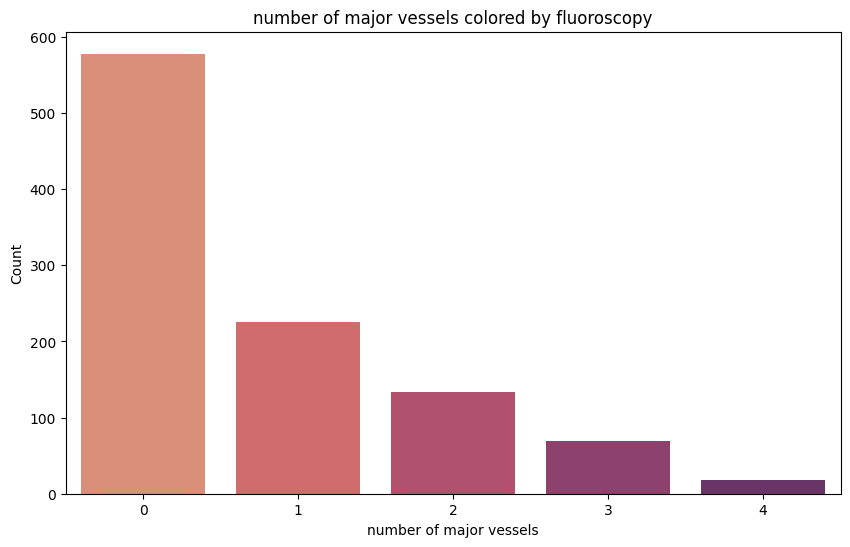

In [114]:
plt.figure(figsize=(10,6))
plt.title('number of major vessels colored by fluoroscopy')
sns.barplot(x=data['ca'].value_counts().index, y=data['ca'].value_counts().values, palette='flare')
plt.xlabel('number of major vessels')
plt.ylabel('Count')
plt.show()

**thal distribution | 0 = normal, 1 = fixed defect, 2 = reversible defect**

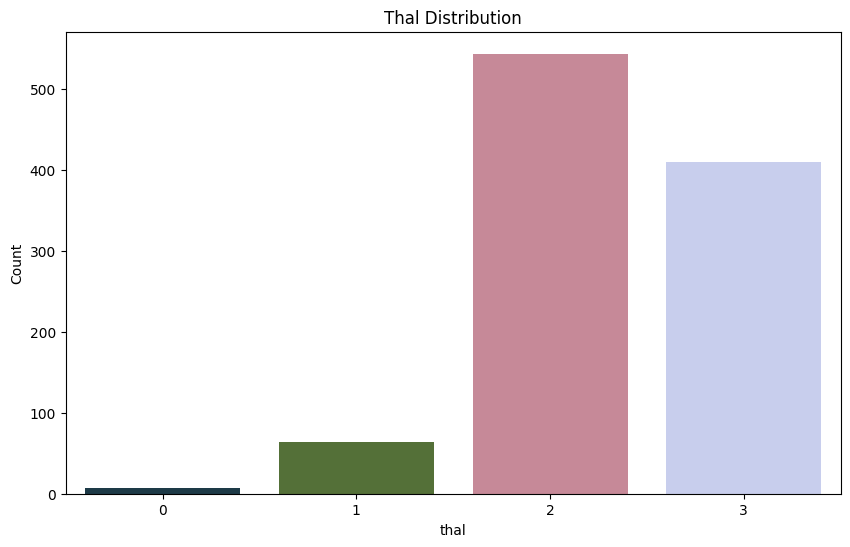

In [115]:
plt.figure(figsize=(10,6))
plt.title('Thal Distribution')
sns.barplot(x=data['thal'].value_counts().index, y=data['thal'].value_counts().values, palette='cubehelix')
plt.xlabel('thal')
plt.ylabel('Count')
plt.show()

**Correlation Heatmap**

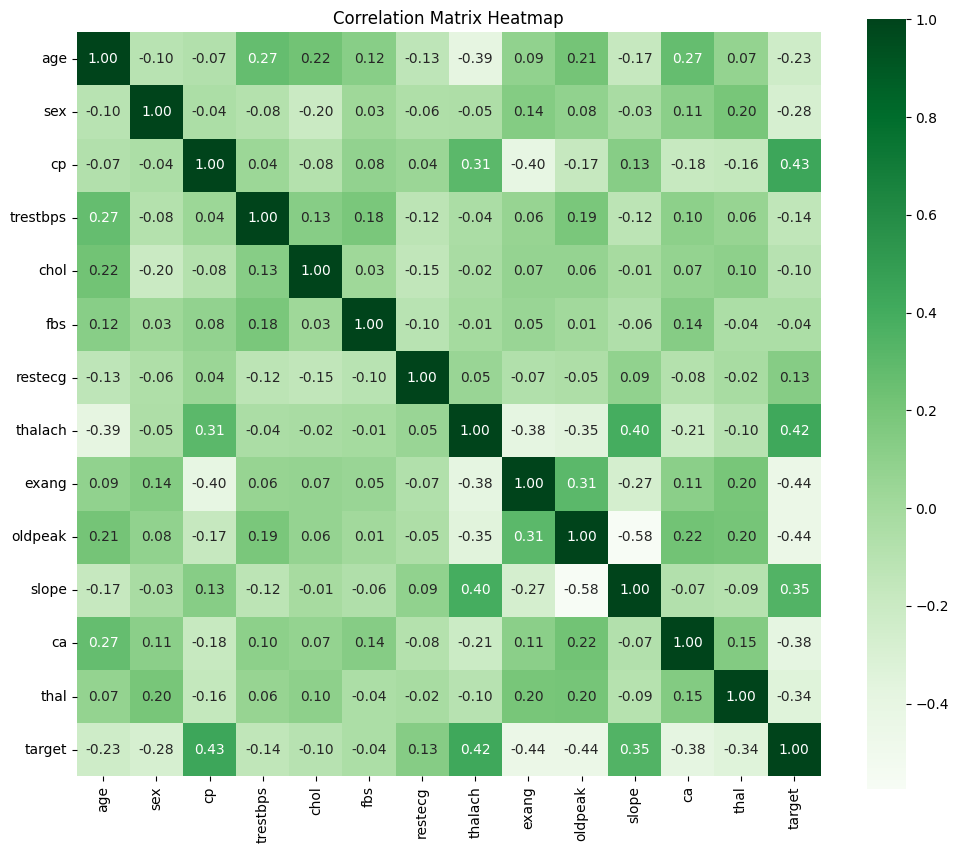

In [123]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='Greens', square=True)
plt.title('Correlation Matrix Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

trestbps, chol, fbs, and restecg do not have strong correlation with the target variable.